Enter the number of vertices: 6
Enter the number of edges: 10
Enter edges as 'vertex1 vertex2 weight':
0 1 7
0 4 8
1 4 3
1 2 6
1 5 5
2 4 4
2 5 2
2 3 5
3 5 2
4 5 3
Weighted Graph:
[0, 7, 0, 0, 8, 0]
[7, 0, 6, 0, 3, 5]
[0, 6, 0, 5, 4, 2]
[0, 0, 5, 0, 0, 2]
[8, 3, 4, 0, 0, 3]
[0, 5, 2, 2, 3, 0]


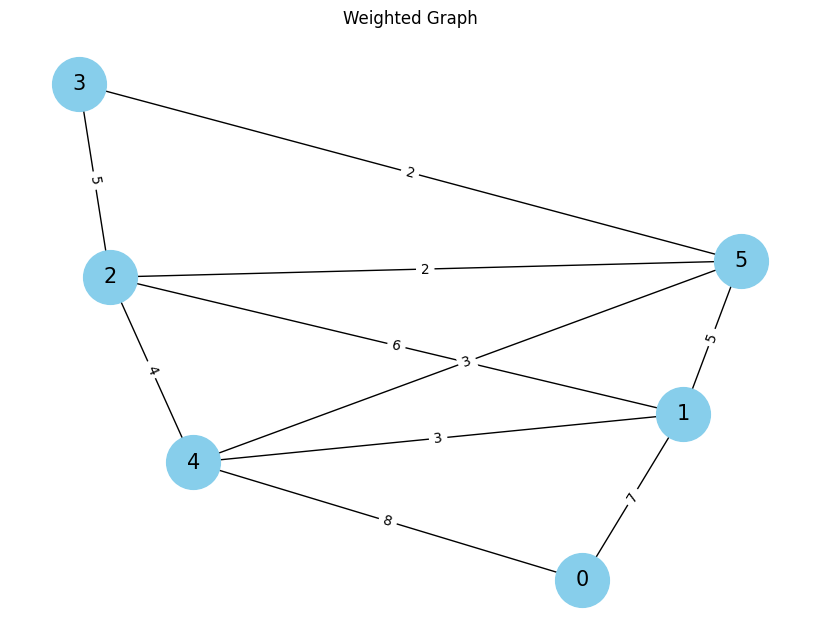

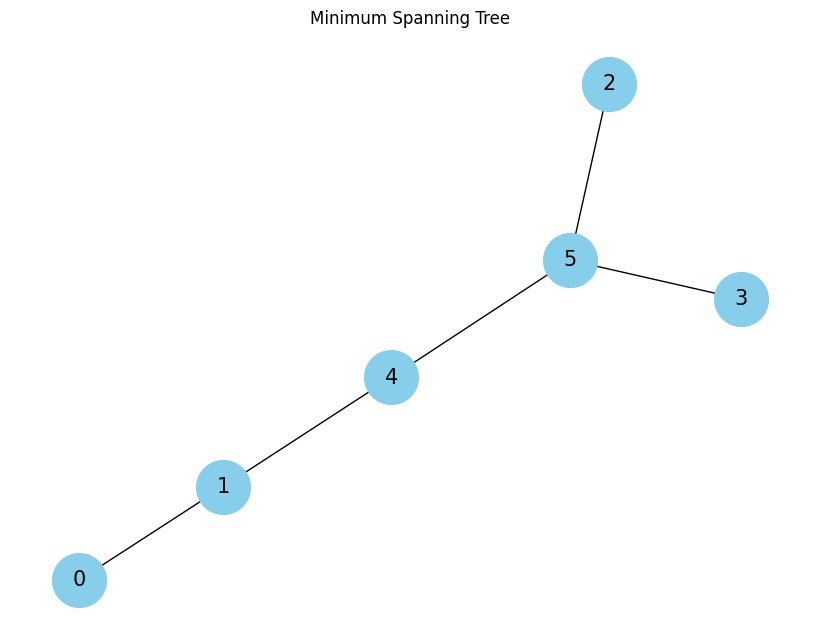


Minimum Spanning Tree:
Edge: 0 - 1, Weight: 7
Edge: 5 - 2, Weight: 2
Edge: 5 - 3, Weight: 2
Edge: 1 - 4, Weight: 3
Edge: 4 - 5, Weight: 3


In [3]:
import networkx as nx
import matplotlib.pyplot as plt

class Graph:
    def __init__(self, vertices):
        self.V = vertices
        self.graph = [[0 for _ in range(vertices)] for _ in range(vertices)]

    def add_edge(self, u, v, weight):
        self.graph[u][v] = weight
        self.graph[v][u] = weight  # Since the graph is undirected

    def display_graph(self):
        print("Weighted Graph:")
        for row in self.graph:
            print(row)

    def min_key(self, key, mst_set):
        min_val = float('inf')
        min_index = None

        for v in range(self.V):
            if key[v] < min_val and not mst_set[v]:
                min_val = key[v]
                min_index = v

        return min_index

    def prim_mst(self):
        parent = [-1] * self.V
        key = [float('inf')] * self.V
        mst_set = [False] * self.V

        key[0] = 0
        parent[0] = -1

        for _ in range(self.V):
            u = self.min_key(key, mst_set)
            mst_set[u] = True

            for v in range(self.V):
                if self.graph[u][v] > 0 and not mst_set[v] and key[v] > self.graph[u][v]:
                    key[v] = self.graph[u][v]
                    parent[v] = u

        return parent

def plot_graph(G, title):
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1500, edge_color='k', linewidths=1, font_size=15)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title(title)
    plt.show()

def main():
    num_vertices = int(input("Enter the number of vertices: "))
    num_edges = int(input("Enter the number of edges: "))

    graph = Graph(num_vertices)

    print("Enter edges as 'vertex1 vertex2 weight':")
    for _ in range(num_edges):
        u, v, weight = map(int, input().split())
        graph.add_edge(u, v, weight)

    graph.display_graph()

    mst_parent = graph.prim_mst()

    # Creating a networkx graph object
    G = nx.Graph()
    G.add_nodes_from(range(num_vertices))

    # Adding edges with weights to the graph
    for i in range(num_vertices):
        for j in range(i + 1, num_vertices):
            if graph.graph[i][j] > 0:
                G.add_edge(i, j, weight=graph.graph[i][j])

    # Plotting the weighted graph
    plot_graph(G, "Weighted Graph")

    # Plotting the minimum spanning tree
    mst_edges = [(mst_parent[i], i) for i in range(1, num_vertices)]
    mst_tree = nx.Graph()
    mst_tree.add_nodes_from(range(num_vertices))
    mst_tree.add_edges_from(mst_edges)
    plot_graph(mst_tree, "Minimum Spanning Tree")

    print("\nMinimum Spanning Tree:")
    for i in range(1, num_vertices):
        print(f"Edge: {mst_parent[i]} - {i}, Weight: {graph.graph[i][mst_parent[i]]}")

if __name__ == "__main__":
    main()
